<a id='start'></a>
# Lezione 2 - Esercizi

#### Utilizziamo ed esploariamo un dataset di Pandas.

Provate a svolgere i seguenti esercizi: <br>
1) [Plottare grafici per età di uomini e donne](#section1)<a href='#section1'></a> <br>
2) [Rappresentare i morti/sopravvissuti per ogni classe](#section2)<a href='#section2'></a><br>
3) [Creare un grafico a torta dei soldi spesi per i biglietti](#section3)<a href='#section3'></a> <br>
4) [Correzione tra prezzo biglietto ed età?](#section4)<a href='#section4'></a> <br>
5) [Correzioni in SerieA?](#section5)<a href='#section5'></a> <br>

Importiamo il dataset del Titanic

In [1]:
import pandas as pd

titanic = pd.read_csv("data/train_dataset_titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id='section1'></a>
## Plottare grafici per età di uomini e donne

Effettuare dei calcoli sulle età degli uomini e delle donne.<br>
Per risolvere l'esercizio:
1. Calcolare le principali statistiche delle serie delle età delle donne e degli uomini
2. Rappresentare le età degli uomini e delle donne su due distinti istrogrammi, per ognuno dei due istogrammi provare a fittare i dati con una fistribuzione normale e disegnare la funzione di fit calcolata.

In [2]:
donne = titanic.loc[titanic.Sex == "female"]
media_donne = donne.Age.mean()
std_donne = donne.Age.std()
print("L'età media delle donne era di: %d anni e la deviazione standard %.2f." % (media_donne, std_donne))

uomini = titanic.loc[titanic.Sex == "male"]
media_uomini = uomini.Age.mean()
std_uomini = uomini.Age.std()
print("L'età media degli uomini era di: %d anni e la deviazione standard %.2f." % (media_uomini, std_uomini))

L'età media delle donne era di: 27 anni e la deviazione standard 14.11.
L'età media degli uomini era di: 30 anni e la deviazione standard 14.68.


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
donne.Age.describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

In [5]:
uomini.Age.describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
from scipy.stats import norm
help(norm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


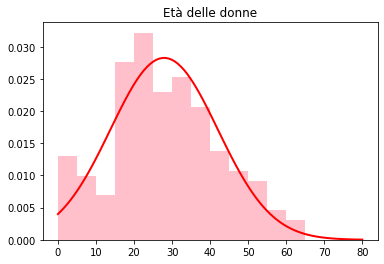

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


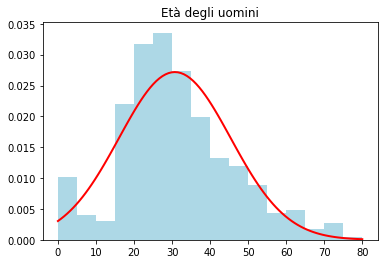

In [22]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
xmin, xmax = 0, 80

plt.hist(donne.Age, bins=16, range=[xmin, xmax], density=True, color="pink")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_donne, std_donne)
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età delle donne")
plt.show()

plt.hist(uomini.Age, bins=16, range=[xmin, xmax], density=True, color="lightblue")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_uomini, std_uomini)
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età degli uomini")
plt.show()

Gli errori che si vedono derivano dal fatto che alcuni passeggeri hanno NaN come valore per l'età e quindi la libreria pyplot non sa come disegnare quel valore nell'istogramma.

In [7]:
u = uomini[uomini.Age.notnull()]
d = donne[donne.Age.notnull()]

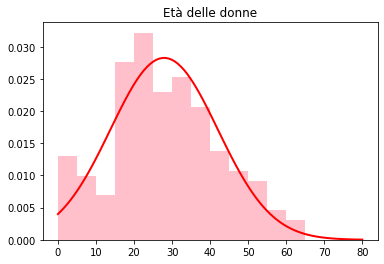

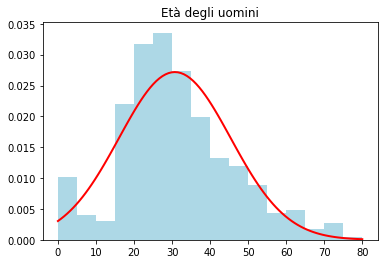

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
xmin, xmax = 0, 80

plt.hist(d.Age, bins=16, range=[xmin, xmax], density=True, color="pink")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_donne, std_donne)
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età delle donne")
plt.show()

plt.hist(u.Age, bins=16, range=[xmin, xmax], density=True, color="lightblue")
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_uomini, std_uomini)
plt.plot(x, p, 'k', color="red", linewidth=2)
plt.title("Età degli uomini")
plt.show()

<a id='section2'></a>
## Rappresentare i morti/sopravvissuti per ogni classe

Rappresentare in un grafico a pila il numero di morti e sopravvissuti per ogni classe di servizio del viaggio (prima classe, seconda classe, terza classe).

In [11]:
byclass = titanic.groupby(['Pclass', 'Survived'])['PassengerId'].aggregate(['count'])
byclass

count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

Abbiamo ottenuto il risultato che ci interessava, ma i dati hanno due indici (PClass e Survived) e un solo valore.

Utilizzando il metodo unstack possiamo far diventare l'indice Survived una nuova dimensione in modo da avere una matrice:

In [12]:
chart_data = byclass.unstack()
chart_data = chart_data.rename_axis('classe')
chart_data

count     
Survived     0    1
classe             
1           80  136
2           97   87
3          372  119

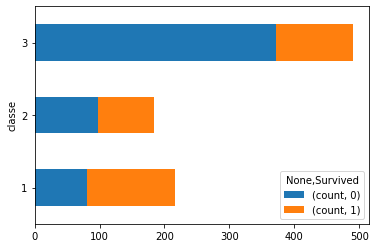

In [13]:
ax = chart_data.plot.barh(stacked=True)
plt.show()

<a id='section3'></a>
## Creare un grafico a torta dei soldi spesi per i biglietti

Creare un grafico a torta che rappresenti il costo complessivo dei biglietti degli uomini e delle donne.

In [14]:
fare_bysex = titanic.groupby(['Sex'])['Fare'].aggregate(['sum']).unstack()
fare_bysex = fare_bysex.rename("prezzo")
fare_bysex

     Sex   
sum  female    13966.6628
     male      14727.2865
Name: prezzo, dtype: float64

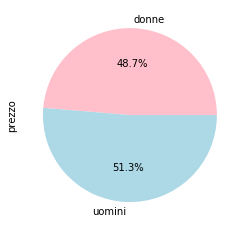

In [15]:
fare_bysex.plot.pie(colors=['pink', 'lightblue'], labels=['donne', 'uomini'], autopct='%1.1f%%')

<a id='section4'></a>
## Correlazione tra prezzo biglietto ed età? 

Verificare se esiste una correlazione tra l'età del passeggero e il prezzo pagato per il biglietto. <br>
La correlezione può essere vista ad occhio facendo un grafico scatter o calcolata con un indice di correlazione.

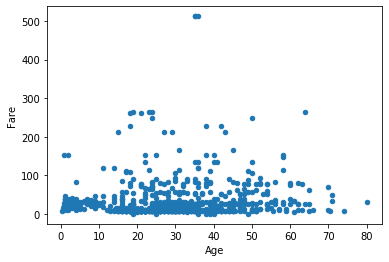

In [16]:
titanic.plot.scatter(x='Age', y='Fare')

In [17]:
titanic[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


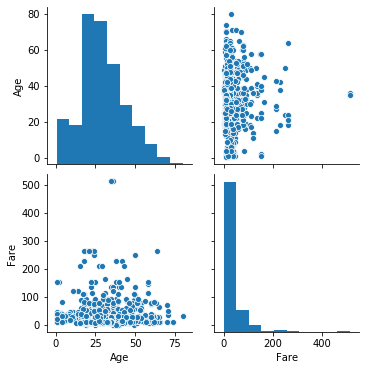

In [18]:
import seaborn as sns

ax = sns.pairplot(titanic[['Age', 'Fare']])
plt.show()

<a id='section5'></a>
## Correlazioni in SerieA? 

Riprendiamo il dataset sulla classifica di Serie A e vediamo se il numero di gol e le partite vinte, pareggiate e perse (in casa e fuori casa) correlano con il punteggio ottenuto in classifica.

In [19]:
classifica_serie_a = pd.read_html(io="http://www.legaseriea.it/it/serie-a/classifica", skiprows=1, header=0)
classifica_serie_a = classifica_serie_a[0]
classifica_serie_a

,SQUADRE,PUNTI,G,V,N,P,G.1,V.1,N.1,P.1,G.2,V.2,N.2,P.2,F,S
0,1 Juventus,63,26,20,3,3,13,12,1,0,13,8,2,3,50,24
1,2 Lazio,62,26,19,5,2,14,11,3,0,12,8,2,2,60,23
2,3 Inter,54,25,16,6,3,12,7,4,1,13,9,2,2,49,24
3,4 Atalanta,48,25,14,6,5,12,6,2,4,13,8,4,1,70,34
4,5 Roma,45,26,13,6,7,13,6,3,4,13,7,3,3,51,35
5,6 Napoli,39,26,11,6,9,13,5,2,6,13,6,4,3,41,36
6,7 Milan,36,26,10,6,10,13,4,5,4,13,6,1,6,28,34
7,8 Hellas Verona,35,25,9,8,8,12,6,3,3,13,3,5,5,29,26
8,9 Parma,35,25,10,5,10,13,6,1,6,12,4,4,4,32,31
9,10 Bologna,34,26,9,7,10,13,4,5,4,13,5,2,6,38,42


In [20]:
classifica_serie_a[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']].corr()

,PUNTI,V.1,N.1,P.1,V.2,N.2,P.2,F,S
PUNTI,1.000000,0.914411,-0.125256,-0.905983,0.876874,0.029278,-0.837259,0.824177,-0.827887
V.1,0.914411,1.000000,-0.348615,-0.851585,0.634148,0.110579,-0.704984,0.668825,-0.818996
N.1,-0.125256,-0.348615,1.000000,-0.143741,0.057298,-0.400834,0.206448,-0.195650,0.140757
P.1,-0.905983,-0.851585,-0.143741,1.000000,-0.731996,0.059682,0.641174,-0.611378,0.819463
V.2,0.876874,0.634148,0.057298,-0.731996,1.000000,-0.236774,-0.726657,0.802543,-0.632176
N.2,0.029278,0.110579,-0.400834,0.059682,-0.236774,1.000000,-0.439118,0.195997,-0.133365
P.2,-0.837259,-0.704984,0.206448,0.641174,-0.726657,-0.439118,1.000000,-0.883133,0.689797
F,0.824177,0.668825,-0.195650,-0.611378,0.802543,0.195997,-0.883133,1.000000,-0.512793
S,-0.827887,-0.818996,0.140757,0.819463,-0.632176,-0.133365,0.689797,-0.512793,1.000000


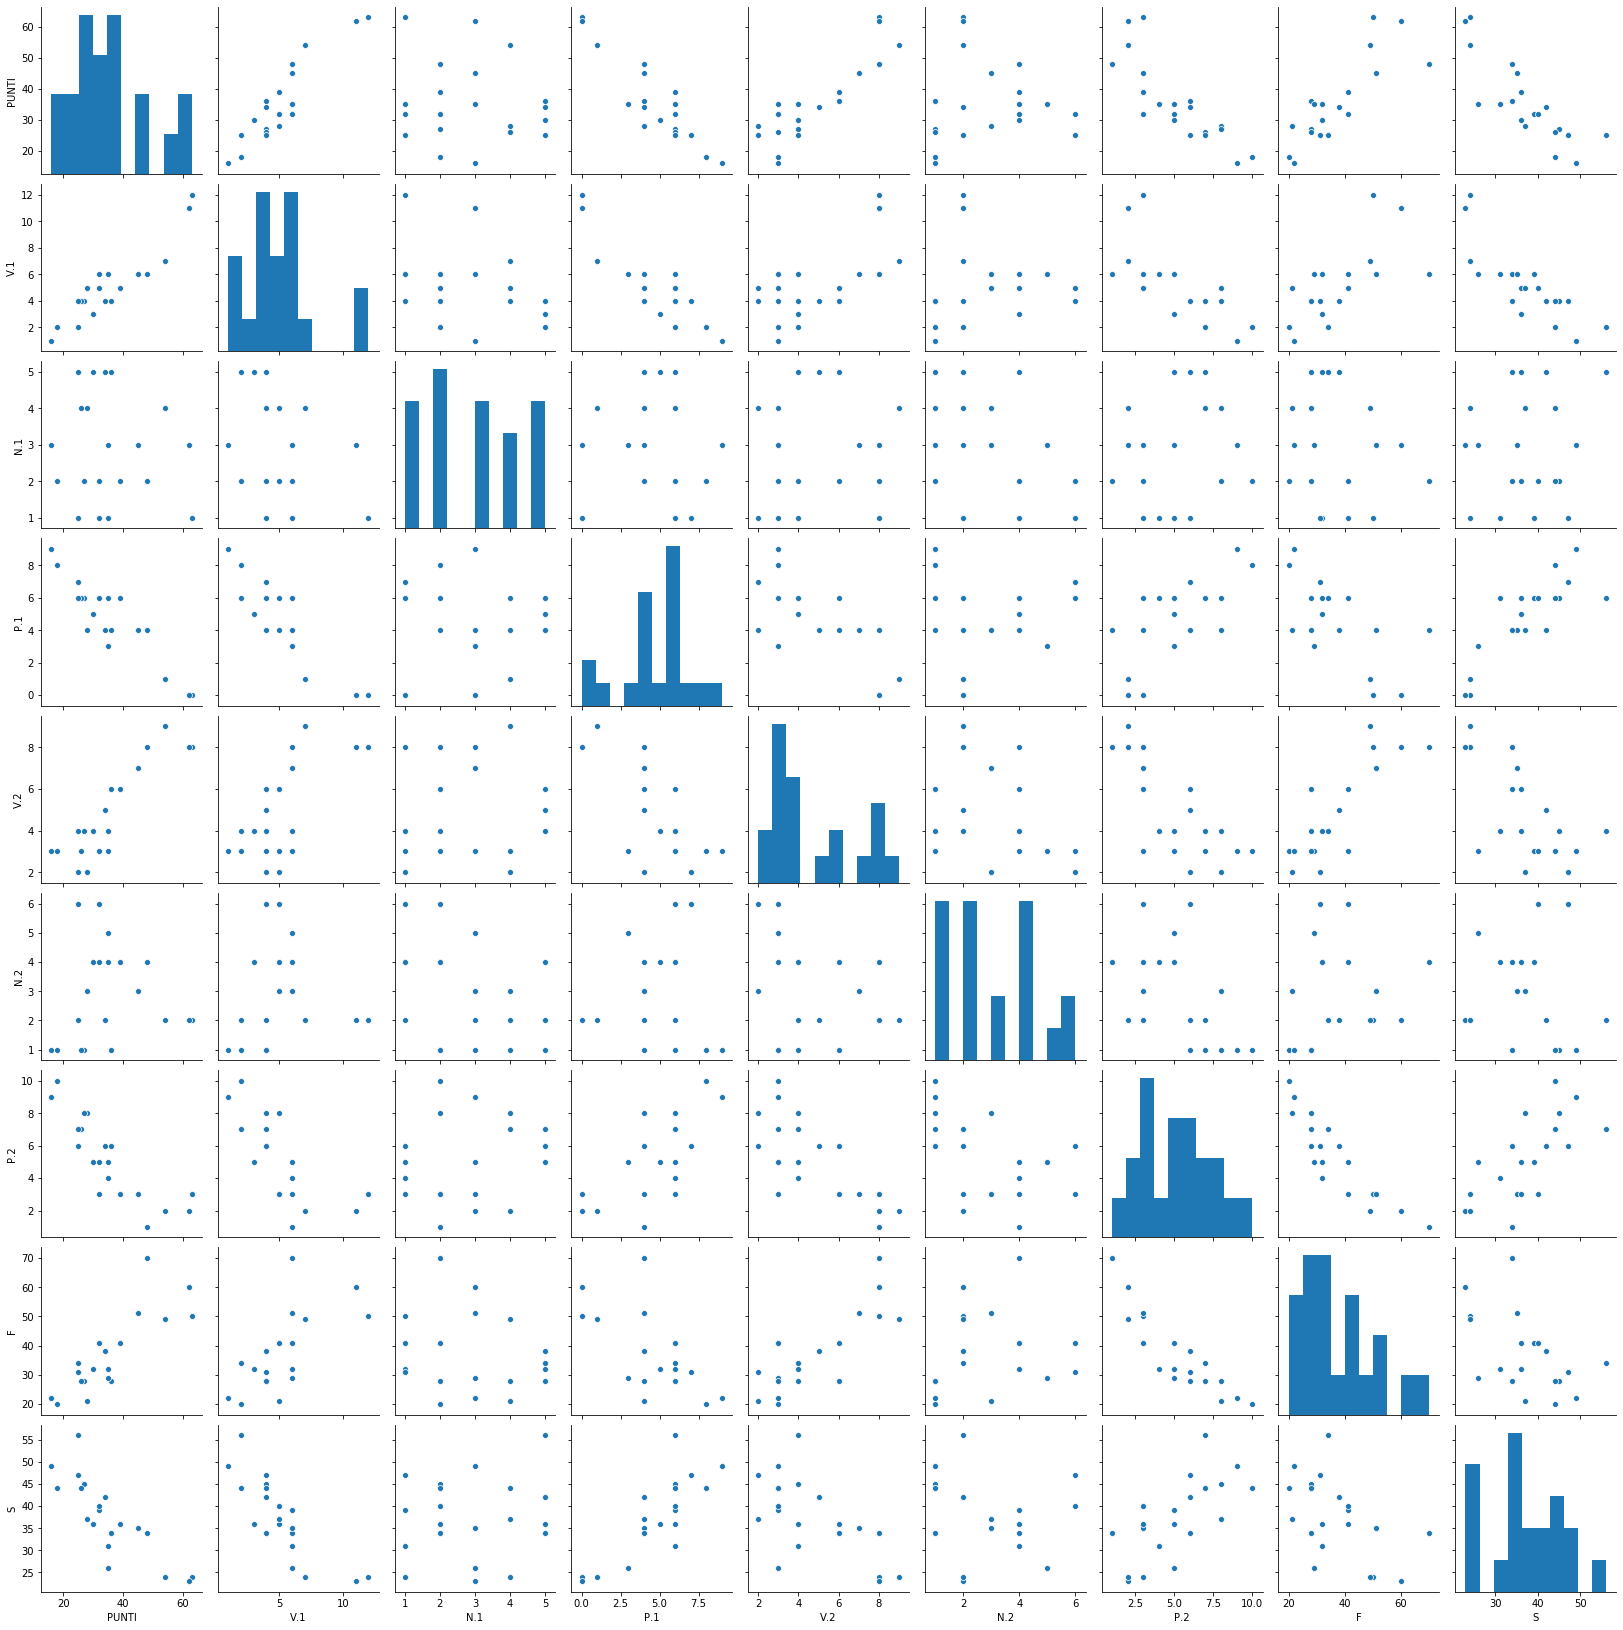

In [21]:
import seaborn as sns

ax = sns.pairplot(classifica_serie_a[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']])
plt.show()

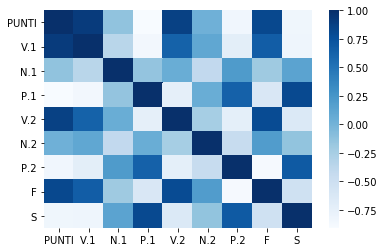

In [22]:
import seaborn as sns

sns.heatmap(classifica_serie_a[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']].corr(), cmap="Blues")
plt.show()

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>